In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('nba_stats.csv')


In [2]:
df.head()

,Anno,Position,id,TEAM,GP,W,L,WIN%,MIN,PTS,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,2023-24,NaN,1,Boston Celtics,4,4,0,1.0,48.0,127.0,...,40.0,52.3,24.0,14.8,7.3,6.3,4.0,20.3,17.8,20.5
1,2023-24,NaN,1,Dallas Mavericks,4,4,0,1.0,48.0,122.5,...,35.3,45.3,22.8,12.8,5.5,3.5,4.0,15.8,24.0,9.0
2,2023-24,NaN,3,Denver Nuggets,5,4,1,0.8,48.0,110.8,...,34.2,43.0,29.0,14.6,7.6,7.6,4.4,18.0,18.2,7.2
3,2023-24,NaN,3,Golden State Warriors,5,4,1,0.8,48.0,112.8,...,35.2,47.4,27.6,15.4,8.4,5.6,4.2,20.6,18.6,8.8
4,2023-24,NaN,3,New Orleans Pelicans,5,4,1,0.8,48.0,108.8,...,34.0,45.6,23.0,13.6,7.4,5.0,5.4,19.8,22.4,0.2


In [3]:
df['Position'].unique()

array([nan, 'F', 'C', 'G'], dtype=object)

Sostituiamo ai NaN nella colonna 'Position' il valore 'All' dato che Nan corrisponde ai valori estratti dal sito che i riferiscono ai dati per tutte
le posizioni.

In [4]:
# Sostituisci 'nan' con 'All' nella colonna 'Position'
df['Position'] = df['Position'].fillna('All')
df['Position'].unique()

array(['All', 'F', 'C', 'G'], dtype=object)

### controlliamo gli NA e notiamo che non vi sono piu valori mancanti

In [5]:
df[df.isna()].count()

Anno        0
Position    0
id          0
TEAM        0
GP          0
W           0
L           0
WIN%        0
MIN         0
PTS         0
FGM         0
FGA         0
FG%         0
3PM         0
3PA         0
3P%         0
FTM         0
FTA         0
FT%         0
OREB        0
DREB        0
REB         0
AST         0
TOV         0
STL         0
BLK         0
BLKA        0
PF          0
PFD         0
+/-         0
dtype: int64

## Features and rows selection

Togliamo i valori dell'anno "2023-24" perchè i valori di questa stagione sono troppo pochi. ROWS SELECTION (IO LO UNIREI CON FEATURES SELECTION)

In [6]:
df_clean = df[df['Anno'] == '2023-24']
df_clean.head()

,Anno,Position,id,TEAM,GP,W,L,WIN%,MIN,PTS,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,2023-24,All,1,Boston Celtics,4,4,0,1.0,48.0,127.0,...,40.0,52.3,24.0,14.8,7.3,6.3,4.0,20.3,17.8,20.5
1,2023-24,All,1,Dallas Mavericks,4,4,0,1.0,48.0,122.5,...,35.3,45.3,22.8,12.8,5.5,3.5,4.0,15.8,24.0,9.0
2,2023-24,All,3,Denver Nuggets,5,4,1,0.8,48.0,110.8,...,34.2,43.0,29.0,14.6,7.6,7.6,4.4,18.0,18.2,7.2
3,2023-24,All,3,Golden State Warriors,5,4,1,0.8,48.0,112.8,...,35.2,47.4,27.6,15.4,8.4,5.6,4.2,20.6,18.6,8.8
4,2023-24,All,3,New Orleans Pelicans,5,4,1,0.8,48.0,108.8,...,34.0,45.6,23.0,13.6,7.4,5.0,5.4,19.8,22.4,0.2


In [7]:
df_clean.keys()

Index(['Anno', 'Position', 'id', 'TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS',
       'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-'],
      dtype='object')

feature seletion between:
'ANNO': Anno di riferimento delle statistiche.

'POSITION': Posizione o ruolo del giocatore nella squadra.

'ID': Identificativo unico o codice del giocatore.

TEAM: Rappresenta la sigla o il nome abbreviato della squadra NBA a cui si riferiscono le statistiche.

GP (Games Played): Indica il numero di partite giocate dalla squadra fino a quel momento nella stagione.

W (Wins): Rappresenta il numero di partite vinte dalla squadra.

L (Losses): Indica il numero di partite perse dalla squadra.

WIN% (Winning Percentage): Questa variabile rappresenta la percentuale di vittorie della squadra, calcolata come il rapporto tra le partite vinte (W) e il totale delle partite giocate (GP). È un indicatore del successo complessivo della squadra.

MIN (Minutes): Questo valore indica il numero totale di minuti giocati dalla squadra nella stagione.

PTS (Points): Rappresenta il totale dei punti segnati dalla squadra durante la stagione.

FGM (Field Goals Made): Indica il totale dei canestri segnati dalla squadra.

FGA (Field Goals Attempted): Rappresenta il totale dei tentativi di canestro effettuati dalla squadra.

FG% (Field Goal Percentage): Questa variabile rappresenta la percentuale di successo nei tiri dal campo, calcolata come il rapporto tra i canestri segnati (FGM) e i tentativi effettuati (FGA).

3PM (Three-Point Field Goals Made): Indica il totale dei tiri da tre punti segnati dalla squadra.

3PA (Three-Point Field Goals Attempted): Rappresenta il totale dei tentativi di tiri da tre punti effettuati dalla squadra.

3P% (Three-Point Percentage): Questa variabile rappresenta la percentuale di successo nei tiri da tre punti, calcolata come il rapporto tra i tiri da tre punti segnati (3PM) e i tentativi effettuati (3PA).

FTM (Free Throws Made): Indica il totale dei tiri liberi segnati dalla squadra.

FTA (Free Throws Attempted): Rappresenta il totale dei tentativi di tiri liberi effettuati dalla squadra.

FT% (Free Throw Percentage): Questa variabile rappresenta la percentuale di successo nei tiri liberi, calcolata come il rapporto tra i tiri liberi segnati (FTM) e i tentativi effettuati (FTA).

OREB (Offensive Rebounds): Indica il totale dei rimbalzi offensivi catturati dalla squadra.

DREB (Defensive Rebounds): Rappresenta il totale dei rimbalzi difensivi catturati dalla squadra.

REB (Total Rebounds): Questo valore rappresenta il totale dei rimbalzi totali catturati dalla squadra, che è la somma di rimbalzi offensivi (OREB) e rimbalzi difensivi (DREB).

AST (Assists): Indica il totale degli assist effettuati dalla squadra, ovvero i passaggi che portano a un canestro.

TOV (Turnovers): Rappresenta il totale dei palloni persi dalla squadra, ad esempio a causa di errori di gestione della palla o passaggi sbagliati.

STL (Steals): Indica il totale degli "stacchi" effettuati dalla squadra, ovvero il numero di volte in cui i giocatori hanno rubato la palla agli avversari.

BLK (Blocks): Rappresenta il totale dei blocchi effettuati dalla squadra, ovvero il numero di volte in cui i giocatori hanno impedito ai tiri avversari di raggiungere il canestro.

BLKA (Blocks Against): Indica il totale dei tentativi di tiri bloccati dagli avversari contro la squadra.

PF (Personal Fouls): Rappresenta il totale delle falli personali commessi dalla squadra.

PFD (Personal Fouls Drawn): Indica il totale dei falli personali subiti dalla squadra.

+/- (Plus-Minus): Questo valore rappresenta la differenza tra i punti segnati dalla squadra quando un giocatore è in campo e i punti subiti dalla squadra quando lo stesso giocatore è in campo. È un indicatore del contributo di un giocatore al successo della squadra durante la partita.

per le nostre analisi specifiche riguardo il tiro da tre terremo nel df esclusivamnete le segeunti feature: ANNO, id, position, TEAM, WIN%, 3PM, 3PA, 3P%.
Ma manterremo comunque un df con all'interno tutte le variabili da  utilizzare per fare prediction.

A noi interessano le variabili che influiscono di più sulla vittoria, facciamo la correlazione e prendiamo quelli coi valori negativi e positivi più alti.

In [8]:
df_All=df_clean[df_clean['Position']=="All"]
df_All.corr()["WIN%"]

id     -0.955754
GP     -0.220861
W       0.955823
L      -0.949885
WIN%    1.000000
MIN    -0.058426
PTS     0.543751
FGM     0.463954
FGA    -0.111585
FG%     0.555900
3PM     0.358749
3PA     0.155005
3P%     0.359777
FTM     0.134225
FTA     0.139467
FT%    -0.034042
OREB   -0.138955
DREB    0.453180
REB     0.272188
AST    -0.006629
TOV    -0.241315
STL    -0.173909
BLK     0.199958
BLKA   -0.471916
PF     -0.223077
PFD     0.184583
+/-     0.800384
Name: WIN%, dtype: float64

In [9]:
df_All.corr()["WIN%"].nlargest(6)

WIN%    1.000000
W       0.955823
+/-     0.800384
FG%     0.555900
PTS     0.543751
FGM     0.463954
Name: WIN%, dtype: float64

In [10]:
df_All.corr()["WIN%"].nsmallest(4)

id     -0.955754
L      -0.949885
BLKA   -0.471916
TOV    -0.241315
Name: WIN%, dtype: float64

Escludiamo i valori di W, WIN%, plus/minus, L e id perchè è scontata la correlazione tra le vittorie e queste. Mentre teniamo le altre, curioso che FG e 3P siano le più alte: andiamo a osservare questi valori nel dettaglio.
Tenendo anche le altre variabili legate quind FGA, FGM, 3PA and 3PM.

In [11]:
df_clean = df_clean[['Anno', 'Position', 'id', 'TEAM', 'WIN%', '3PM', '3PA', '3P%', 'FGM', 'FGA', 'FG%', "AST", 'BLKA', 'TOV']]
df_clean.head()

,Anno,Position,id,TEAM,WIN%,3PM,3PA,3P%,FGM,FGA,FG%,AST,BLKA,TOV
0,2023-24,All,1,Boston Celtics,1.0,16.8,41.5,40.4,46.8,92.3,50.7,24.0,4.0,14.8
1,2023-24,All,1,Dallas Mavericks,1.0,18.3,44.5,41.0,42.5,88.8,47.9,22.8,4.0,12.8
2,2023-24,All,3,Denver Nuggets,0.8,10.8,31.8,34.0,45.4,89.4,50.8,29.0,4.4,14.6
3,2023-24,All,3,Golden State Warriors,0.8,13.6,38.4,35.4,41.8,89.6,46.7,27.6,4.2,15.4
4,2023-24,All,3,New Orleans Pelicans,0.8,12.0,35.6,33.7,39.4,89.4,44.1,23.0,5.4,13.6


C:\Users\Loren\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


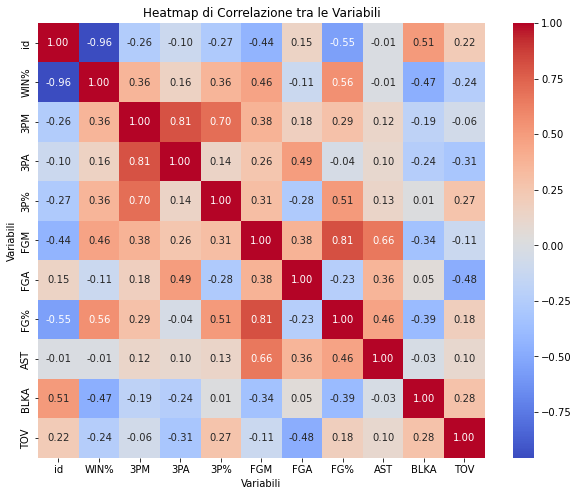

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df_clean[df_clean['Position'] == 'All'].corr()

# Crea un oggetto di figura Matplotlib e una heatmap con Seaborn
plt.figure(figsize=(10, 8))  # Specifica le dimensioni del grafico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Aggiungi etichette agli assi
plt.xlabel("Variabili")
plt.ylabel("Variabili")
plt.title("Heatmap di Correlazione tra le Variabili")

# Mostra il grafico
plt.show()

### Unique ID Creation

Cambiamo la colonna id, invece di un numero prendiamo il nome della squadra e l'anno della regual season, e la posizione. in modo da avere una chiave unica, e che tramite essa si possa ricercare i dati specifici di una squadra in un determinato anno e per uno specifico ruolo.

In [13]:
# Crea la colonna "id" con il formato "Anno/TEAM"
df_clean['ID'] = df_clean['Anno'].str[-5:] + '_' + df_clean['TEAM'] + '_' + df_clean['Position']


#imposto la nuova colonna unica che ho ottenuto ID come l'indice del nostro df
df_clean = df_clean.set_index('ID')

# Visualizza il DataFrame risultante
df_clean.head()

,Anno,Position,id,TEAM,WIN%,3PM,3PA,3P%,FGM,FGA,FG%,AST,BLKA,TOV
ID,,,,,,,,,,,,,,
23-24_Boston Celtics_All,2023-24,All,1,Boston Celtics,1.0,16.8,41.5,40.4,46.8,92.3,50.7,24.0,4.0,14.8
23-24_Dallas Mavericks_All,2023-24,All,1,Dallas Mavericks,1.0,18.3,44.5,41.0,42.5,88.8,47.9,22.8,4.0,12.8
23-24_Denver Nuggets_All,2023-24,All,3,Denver Nuggets,0.8,10.8,31.8,34.0,45.4,89.4,50.8,29.0,4.4,14.6
23-24_Golden State Warriors_All,2023-24,All,3,Golden State Warriors,0.8,13.6,38.4,35.4,41.8,89.6,46.7,27.6,4.2,15.4
23-24_New Orleans Pelicans_All,2023-24,All,3,New Orleans Pelicans,0.8,12.0,35.6,33.7,39.4,89.4,44.1,23.0,5.4,13.6


Salviamo 4 subset, ognuno relativo al valore nella colonna position, in modo da facilizzarci le anilisi e la gestione dei dati

In [14]:
df_All = df_clean[df_clean['Position'] == 'All']
df_F = df_clean[df_clean['Position'] == 'F']
df_G = df_clean[df_clean['Position'] == 'G']
df_C = df_clean[df_clean['Position'] == 'C']

vediamo la descrizione, ovvero qualche ariabile descrittiva per il nostro df riguardante tutte le posizioni

In [15]:
df_All.describe()

,id,WIN%,3PM,3PA,3P%,FGM,FGA,FG%,AST,BLKA,TOV
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,14.000000,0.506633,12.426667,35.140000,35.283333,41.443333,89.563333,46.300000,25.313333,5.216667,14.890000
std,8.905636,0.231364,2.124883,4.271122,3.604029,2.628843,3.383274,2.776875,2.926423,1.193685,1.598782
min,1.000000,0.000000,8.800000,29.000000,29.300000,36.400000,82.500000,40.000000,19.400000,3.400000,11.500000
25%,7.000000,0.349750,11.125000,31.850000,32.475000,39.500000,88.200000,44.600000,23.525000,4.200000,13.700000
50%,13.000000,0.500000,12.450000,34.600000,35.100000,41.350000,89.500000,46.450000,25.200000,5.200000,14.800000
75%,21.750000,0.600000,13.550000,37.100000,37.350000,43.275000,90.750000,48.125000,27.600000,6.150000,16.000000
max,30.000000,1.000000,18.300000,44.500000,42.000000,46.800000,98.500000,50.800000,31.500000,7.500000,18.200000


In [16]:
print(df_All.groupby('Anno').mean()["3PM"])

Anno
2023-24    12.426667
Name: 3PM, dtype: float64


## FEATURES SELECTION

DIMINUIAMO IL NUMERO DI VARIABILE, ELIMINANDO QUELLE SUPERFLUE, ANALIZZIAMO ANCHE LA CORRELAZIONE PER INDIVIDUARE E C'è UN EVENTULE COMPORTAMENTO STRANO

## feature transformation

In [17]:
df_clean.dtypes

Anno         object
Position     object
id            int64
TEAM         object
WIN%        float64
3PM         float64
3PA         float64
3P%         float64
FGM         float64
FGA         float64
FG%         float64
AST         float64
BLKA        float64
TOV         float64
dtype: object

In [18]:
df_clean["Position"] = df_clean["Position"].astype("category")
df_clean["TEAM"] = df_clean["TEAM"].astype("category")

In [19]:
df_clean['Anno'] = df_clean['Anno'].astype(str)

# Estrai l'anno con le ultime due cifre
anni = df_clean['Anno'].str.split('-').str[1]

# Applica la regola per determinare l'anno corretto
df_clean['Anno'] = anni.apply(lambda x: '20' + x if int(x) < 97 else '19' + x)

# Converti la colonna 'Anno' in datetime con solo l'anno
df_clean['Anno'] = pd.to_datetime(df_clean['Anno'], format='%Y').dt.year


In [20]:
df_clean['Anno'].unique()

array([2024], dtype=int64)

In [ ]:
df_clean.dtypes

Anno           int64
Position    category
id             int64
TEAM        category
WIN%         float64
3PM          float64
3PA          float64
3P%          float64
FGM          float64
FGA          float64
FG%          float64
AST          float64
BLKA         float64
TOV          float64
dtype: object

In [21]:
df_clean.to_csv('nba_stats_clean_2024.csv', index=False)


Adesso terminato il pre processing proseguiamo con le analisi.